In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
df_ind = pd.read_csv('india.csv')

In [42]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_ind['new_cases'].values.reshape(-1, 1)) #reshape for (n, ) to (n, 1)

look_back = 30
prediction_days = 500

x_train, y_train = [], []

for x in range(look_back, len(scaled_data) - prediction_days):
  x_train.append(scaled_data[x - look_back: x, 0])
  y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [43]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))  #our predictions
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [44]:
model.fit(x_train, y_train, epochs = 5, batch_size = 32)

Epoch 1/5
16/16 [==============================] - 12s 80ms/step - loss: 0.0241
Epoch 2/5
16/16 [==============================] - 1s 74ms/step - loss: 0.0095
Epoch 3/5
16/16 [==============================] - 1s 75ms/step - loss: 0.0050
Epoch 4/5
16/16 [==============================] - 1s 74ms/step - loss: 0.0022
Epoch 5/5
16/16 [==============================] - 1s 74ms/step - loss: 0.0025


In [45]:
x_test = []
for x in range(len(scaled_data) - prediction_days, len(scaled_data)):
  x_test.append(scaled_data[x-look_back: x, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [46]:
predicted_cases = model.predict(x_test)
predicted_cases = scaler.inverse_transform(predicted_cases).reshape(-1, )

In [47]:
pred = np.concatenate((df_ind['new_cases'].values[:len(scaled_data) - prediction_days], predicted_cases))

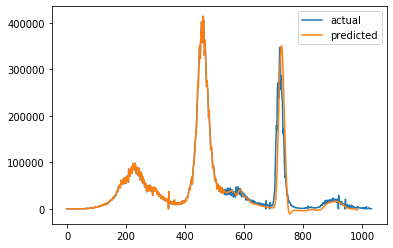

In [51]:
plt.figure()
plt.plot(df_ind['new_cases'].values, label="actual")
plt.plot(pred, label="predicted")
plt.legend()
plt.show()